In [57]:
import nltk
from nltk import FreqDist
import pandas as pd
import numpy as np
import pandas as pd
import csv
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
from nltk.draw.tree import TreeView
import json
day = pd.read_json (r'20_day_youtube.json')
day.to_csv (r'20.csv', index = None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
day.describe()

,time_in_seconds
count,32284.000000
mean,15600.652514
std,8494.598710
min,121.863000
25%,8002.097750
50%,17187.005000
75%,22583.004500
max,30132.166000


In [4]:
day.head()

,action_type,author,message,message_id,message_type,time_in_seconds,time_text,timestamp,emotes
0,add_chat_item,"{'id': 'UCcF3a5pqL9Upi4fkAZcjY_g', 'images': [...",Hello,CjoKGkNNQzZ6Sl9PNl9jQ0Zkb0gxZ0FkZ0xRSnZREhxDS2...,text_message,121.863,2:01,2022-05-19 12:55:37.899407,NaN
1,add_chat_item,"{'id': 'UCy-n3TJZEFRFQd1iS0_fOUg', 'images': [...",objection hearsay to whatever comes out of Amb...,CkUKGkNQREY0NmJPNl9jQ0ZRMEgxZ0FkZnBjQkZnEidDTm...,text_message,136.927,2:16,2022-05-19 12:55:52.957747,NaN
2,add_chat_item,"{'id': 'UCKfnCjcWULmD1G_iQ2KMAfQ', 'images': [...",good morning besties,CjoKGkNNNnp5OERPNl9jQ0ZjcmZ3UW9kSmRzQ1JBEhxDTX...,text_message,191.028,3:11,2022-05-19 12:56:47.088123,NaN
3,add_chat_item,"{'id': 'UCeui4cP9QMcVfk5ZlOQXI4g', 'images': [...",Johnny,CjoKGkNKTHhxdHJPNl9jQ0ZVSVRmUW9kS3pFR0VnEhxDTH...,text_message,245.016,4:05,2022-05-19 12:57:41.081288,NaN
4,add_chat_item,"{'id': 'UCObs8TqWkpiKc0Z230k3EwQ', 'images': [...",So early!,CjoKGkNORG04LWZPNl9jQ0ZiVWdOUW9kc01nRnBnEhxDUG...,text_message,273.489,4:33,2022-05-19 12:58:09.538957,NaN


In [5]:
day['message'].value_counts()

:blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart:Justice for Johnny:blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart::blue_heart:    70
#TRUMP4PRISON                                                                                                                                                                                                                                                                                                                                                         64
#AmberTurd                                                                                                                                                                                                                                                                            

In [6]:
test = day[day["message"].str.contains("evil")]

In [7]:
test.count()

action_type        86
author             86
message            86
message_id         86
message_type       86
time_in_seconds    86
time_text          86
timestamp          86
emotes             19
dtype: int64

In [8]:
day = day['message'] = day['message'].str.lower()

In [9]:
#day = day['message'].str.split(expand=True).stack().value_counts()

In [10]:
print(day.head(60))

0                                                 hello
1     objection hearsay to whatever comes out of amb...
2                                 good morning besties 
3                                                johnny
4                                             so early!
5     amber rehearsing her routine crying and lies lmao
6                    is there a way to get rid of bots?
7                        new faces in turd's legal team
8                                rise and shiiinnnneee!
9                                  fart :dashing_away: 
10                            say i if u support johnny
11             you switch it to top chat instead of all
12                                                    i
13                                               amber 
14                                                   hi
15                                        :clown_face: 
16                    turd got her legal team from wish
17    you go this johnny! stay strong. we are al

In [11]:
day_split = day['message'].str.split(expand=True).stack()

In [12]:
day_C = day['message'].str.split(expand=True).stack().value_counts()

In [13]:
print(day_split.head(60))

0   0              hello
1   0          objection
    1            hearsay
    2                 to
    3           whatever
    4              comes
    5                out
    6                 of
    7              amber
    8              heard
    9            defence
    10         witnesses
2   0               good
    1            morning
    2            besties
3   0             johnny
4   0                 so
    1             early!
5   0              amber
    1         rehearsing
    2                her
    3            routine
    4             crying
    5                and
    6               lies
    7               lmao
6   0                 is
    1              there
    2                  a
    3                way
    4                 to
    5                get
    6                rid
    7                 of
    8              bots?
7   0                new
    1              faces
    2                 in
    3             turd's
    4              legal


In [14]:
day_split.value_counts()

the         6704
is          6152
a           4554
to          4231
amber       3620
            ... 
wrinkles       1
tho?           1
idaly          1
client?        1
moronic        1
Length: 25973, dtype: int64

In [15]:
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
worf_quote = "Sir, I protest. I am not a merry man!"

In [17]:
stop_words = set(stopwords.words("english"))


In [18]:
print(day_split)

0      0           hello
1      0       objection
       1         hearsay
       2              to
       3        whatever
                ...     
32282  8        anything
       9              on
       10           a.h.
32283  0     freeloading
       1         friends
Length: 237047, dtype: object


In [19]:
filtered_list = []

In [20]:
for word in day_split:
           if word.casefold() not in stop_words:
                filtered_list.append(word)

In [21]:
tag = nltk.pos_tag(filtered_list)

In [58]:
print(tag)

[('hello', 'JJ'), ('objection', 'NN'), ('hearsay', 'VBP'), ('whatever', 'WDT'), ('comes', 'VBZ'), ('amber', 'RB'), ('heard', 'JJ'), ('defence', 'NN'), ('witnesses', 'NNS'), ('good', 'JJ'), ('morning', 'NN'), ('besties', 'NNS'), ('johnny', 'VBP'), ('early!', 'JJ'), ('amber', 'IN'), ('rehearsing', 'VBG'), ('routine', 'JJ'), ('crying', 'NN'), ('lies', 'VBZ'), ('lmao', 'VBZ'), ('way', 'NN'), ('get', 'VB'), ('rid', 'JJ'), ('bots?', 'JJ'), ('new', 'JJ'), ('faces', 'VBZ'), ("turd's", 'JJ'), ('legal', 'JJ'), ('team', 'NN'), ('rise', 'NN'), ('shiiinnnneee!', 'JJ'), ('fart', 'NN'), (':dashing_away:', 'NNS'), ('say', 'VBP'), ('u', 'JJ'), ('support', 'NN'), ('johnny', 'NN'), ('switch', 'VB'), ('top', 'JJ'), ('chat', 'NN'), ('instead', 'RB'), ('amber', 'VB'), ('hi', 'JJ'), (':clown_face:', 'NNP'), ('turd', 'NN'), ('got', 'VBD'), ('legal', 'JJ'), ('team', 'NN'), ('wish', 'NN'), ('go', 'VBP'), ('johnny!', 'NN'), ('stay', 'NN'), ('strong.', 'JJ'), ('you!!!', 'NN'), ('dog', 'NN'), ('stepped', 'VBD'), (

In [23]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

In [24]:
chunk_parser = nltk.RegexpParser(grammar)

In [25]:
tree = chunk_parser.parse(tag)


In [26]:
frequency_distribution = FreqDist(filtered_list)

In [27]:
print(frequency_distribution)

<FreqDist with 25818 samples and 142545 outcomes>


In [49]:
frequency_distribution.most_common(20)

[('amber', 3620),
 ('johnny', 3019),
 ('depp', 1030),
 ('lol', 906),
 ('like', 878),
 ('get', 712),
 ('team', 670),
 ('justice', 613),
 ('go', 582),
 ('heard', 507),
 ('people', 497),
 ('one', 481),
 ('time', 474),
 ('turd', 440),
 ('know', 428),
 ('would', 427),
 ('jd', 422),
 ('going', 419),
 ('witness', 406),
 ('elaine', 405)]

In [52]:
meaningful_words = [
    word for word in filtered_list if word.casefold() not in stop_words
]

In [55]:
frequency_distribution = FreqDist(meaningful_words)

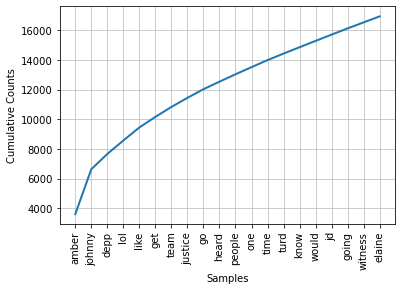

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [56]:
frequency_distribution.plot(20, cumulative=True)